# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

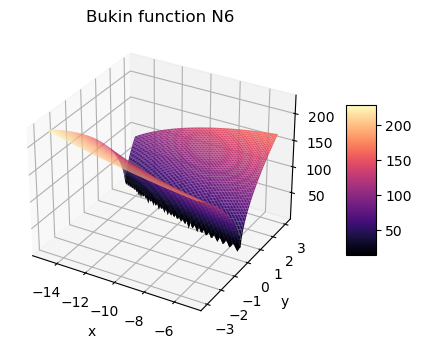

In [1]:
#ex1:
#Implement a function 𝑓 for this function and represent it graphic using matplotlib.
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(x,y):
    return 100 * np.sqrt(np.abs(y-0.01*x*x)) + 0.01*np.abs(x+10)

x = np.linspace(-15, -5,100)
y = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)

Z = f(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')

surface = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='magma', linewidth=0)
fig.colorbar(surface, shrink=0.5, aspect=5)

# plt.scatter(X,Y,Z,marker='x', color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Bukin function N6')
plt.show()


*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [2]:
#ex2
#hill climbing algorithm that finds the function's minimum

#a state is the representation of the data that goes in the algorithm
#in this case the state would be the pair (x,y)

#a neighbour is a pair of coordinates that is close to the initial pair
# but deviates by a small number (this time i will use 0.1)

#the stop criteria i will use is that the difference between iterations is 
# less than a specific value (0.0001)
import numpy as np


def f(x,y):
    return 100 * np.sqrt(np.abs(y-0.01*x*x)) + 0.01*np.abs(x+10)


def generateNeighbours(x,y,stepsize):
    neighbours = list()
    neighbours.append((x+stepsize, y))
    neighbours.append((x+stepsize, y+stepsize))
    neighbours.append((x+stepsize, y-stepsize))
    neighbours.append((x, y+stepsize))
    neighbours.append((x, y-stepsize))
    neighbours.append((x-stepsize, y))
    neighbours.append((x-stepsize, y+stepsize))
    neighbours.append((x-stepsize, y-stepsize))
    return neighbours

def bestNeighbour(x,y, neighbours):
#     best = (neighbours[0][0],neighbours[0][1])
    best = (x,y)
    for el in neighbours:
        if f(el[0],el[1]) < f(best[0],best[1]):
            best = el
    return best

# neighbours = generateNeighbours(-9.9,0.9,0.1)
# print(neighbours)
# print(bestNeighbour(-9.9,0.9,neighbours))

def hillClimbingAlgorithm(init_x,init_y):
    state_x, state_y = init_x,init_y
    for i in range(1000):
        value = f(state_x,state_y)
        
        i = 1
        while i<5:
            neighbours = generateNeighbours(state_x,state_y, 0.5*i)
#             print(f'state: {state_x},{state_y}')
#             print(f'neighbours: {neighbours}')
            best_neighbour = bestNeighbour(state_x,state_y,neighbours)
#             print(f'best_neighbour: {best_neighbour}')
            if best_neighbour!=(state_x,state_y):
                break
            i+=1
       
        
        if abs(value - f(best_neighbour[0], best_neighbour[1])) < 0.0001:
            break
        
        state_x, state_y = best_neighbour[0], best_neighbour[1]
    return state_x, state_y

# minimum_x,minimum_y = hillClimbingAlgorithm(-10,3)

def findGlobalMinimumIdea():
    minimumlist = list()
    for x in range(-15,-5):
        for y in range(-3,3):
            minimumlist.append((hillClimbingAlgorithm(x,y)))
    minimum = f(minimumlist[0][0], minimumlist[0][1])
    elements = (minimumlist[0][0], minimumlist[0][1])
    for el in minimumlist:
        if f(el[0],el[1]) < minimum:
                minimum = f(el[0],el[1])
                elements = el
    return elements, minimum

# value = f(minimum_x,minimum_y)
# print(f'Minimum at {minimum_x},{minimum_y} with the value={value}')

coord, value = findGlobalMinimumIdea()
print(f'Global minimum at {coord} with value= {value}')


Global minimum at (-10.0, 1.0) with value= 0.0


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [63]:
#ex3
#implement a hill climbing alg for the knapsack problem
import numpy as np

def calculateProfit(profits, solution):
    final = 0
    for i in range(len(solution)):
        final+=solution[i]*profits[i]
    return final

def calculateWeight(weights, solution):
    final = 0
    for i in range(len(solution)):
        final+=solution[i]*weights[i]
    return final

def generateNeighbours(solution):
    neighbours = list()
    for i in range(len(solution)):
        aux = np.copy(solution)
        aux[i] = 1-aux[i]
        neighbours.append(aux)
    return neighbours

def bestNeighbour(neighbours, profits, weights, maxWeight):
    bestNeighbour = None
    bestProfit = 0
    for neigh in neighbours:
        if calculateWeight(weights, neigh) <= maxWeight:
            neighProfit = calculateProfit(profits, neigh)
            if neighProfit > bestProfit:
                bestNeighbour = neigh
                bestProfit = neighProfit
    return bestNeighbour

def hillClimbingAlg(profits, weights, maxWeight, initialSolution):
    currSolution = initialSolution
    currProfit = calculateProfit(profits, currSolution)
    
    while True:
        neighbours = generateNeighbours(currSolution)
        
        bestNeigh = bestNeighbour(neighbours, profits, weights, maxWeight)
        
        if bestNeigh is None:
            return currSolution
        
        neighbourProfit = calculateProfit(profits,bestNeigh)
    
        if neighbourProfit > currProfit:
            currSolution = bestNeigh
            currProfit = neighbourProfit
        else:
            return currSolution
        
    

def testHillClimbingAlg1():
    profits = [1,2,3]
    weights = [4,5,1]
    maxWeight = 4
    initialSolution = [0,0,0]
    solution = hillClimbingAlg(profits, weights, maxWeight, initialSolution)
    profit = calculateProfit(profits, solution)
    weight = calculateWeight(weights, solution)
    print(f'the solution is: {solution} with the profit {profit} and the weight {weight}')

    
def testHillClimbingAlg2():
    weights = [2, 3, 1, 4]
    profits = [4, 5, 3, 7]
    maxWeight = 5
    initialSolution = [0,0,0,0]
    solution = hillClimbingAlg(profits, weights, maxWeight, initialSolution)
    profit = calculateProfit(profits, solution)
    weight = calculateWeight(weights, solution)
    print(f'the solution is: {solution} with the profit {profit} and the weight {weight}')

    
testHillClimbingAlg1()
testHillClimbingAlg2()
    
    



the solution is: [0 0 1] with the profit 3 and the weight 1
the solution is: [0 0 1 1] with the profit 10 and the weight 5



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [64]:
#ex4:
#improve it to increase the chances of finding the solution

import numpy as np

def calculateProfit(profits, solution):
    final = 0
    for i in range(len(solution)):
        final+=solution[i]*profits[i]
    return final

def calculateWeight(weights, solution):
    final = 0
    for i in range(len(solution)):
        final+=solution[i]*weights[i]
    return final

def generateNeighbours(solution):
    neighbours = list()
    for i in range(len(solution)):
        aux = np.copy(solution)
        aux[i] = 1-aux[i]
        neighbours.append(aux)
    return neighbours

def bestNeighbour(neighbours, profits, weights, maxWeight):
    bestNeighbour = None
    bestProfit = 0
    for neigh in neighbours:
        if calculateWeight(weights, neigh) <= maxWeight:
            neighProfit = calculateProfit(profits, neigh)
            if neighProfit > bestProfit:
                bestNeighbour = neigh
                bestProfit = neighProfit
    return bestNeighbour

def hillClimbingAlg(profits, weights, maxWeight, initialSolution):
    currSolution = initialSolution
    currProfit = calculateProfit(profits, currSolution)
    
    while True:
        neighbours = generateNeighbours(currSolution)
        
        bestNeigh = bestNeighbour(neighbours, profits, weights, maxWeight)
        
        if bestNeigh is None:
            return currSolution
        
        neighbourProfit = calculateProfit(profits,bestNeigh)
    
        if neighbourProfit > currProfit:
            currSolution = bestNeigh
            currProfit = neighbourProfit
        else:
            return currSolution
        
def multipleRestarts(profits, weights, maxWeight):
    solutions = list()
    for i in range(len(profits)):
        initsolution = np.random.randint(2,size=len(profits))
        weight = calculateWeight(weights,initsolution)
        while weight>maxWeight:
            initsolution = np.random.randint(2,size=len(profits))
            weight = calculateWeight(weights,initsolution)
        
        aux = hillClimbingAlg(profits, weights, maxWeight, initsolution)
        solutions.append(aux)

    print(solutions)
    maxProfit = 0
    optimalSolution = None
    for sol in solutions:
        profit = calculateProfit(profits, sol)
        if profit>maxProfit:
            maxProfit = profit
            optimalSolution = sol
    return optimalSolution, maxProfit

def tryOptimizedSolution():
    weights = [2, 3, 1, 4]
    profits = [4, 5, 3, 7]
    maxWeight = 5
    solution, profit = multipleRestarts(profits, weights, maxWeight)
    weight = calculateWeight(weights, solution)
    print(f'the solution is: {solution} with the profit {profit} and the weight {weight}')

tryOptimizedSolution()

[array([1, 0, 1, 0]), array([1, 1, 0, 0]), array([0, 0, 1, 1]), array([0, 0, 1, 1])]
the solution is: [0 0 1 1] with the profit 10 and the weight 5
